## 1. Loading the dataset into python environment

In [3]:
#reading the data into python environment and assigning the index column as 'ID'.

#train dataset
train=pd.read_csv('train_PDjVQMB.csv',index_col='ID')

#test dataset
test=pd.read_csv('test_lTY72QC.csv',index_col='ID')

#sample submission dataset
sam=pd.read_csv('sample_OoSmYo5.csv',index_col="ID")

In [4]:
#displaying the train data
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
ID,,,,,,,,,,
84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [5]:
#displaying the column names
train.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn'],
      dtype='object')

In [6]:
train.info()# displaying the information of dataset

<class 'pandas.core.frame.DataFrame'>
Index: 6650 entries, 84e2fcc9 to 57b39511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 571.5+ KB


- <b> There are 6650 rows and 10 columns in train data.</b>

## 2. Exploratory Data Analysis

In [10]:
train.describe().T # checking the statistical values

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


In [11]:
train.dtypes# finding the types of  values in the columns

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

- <b> Numerical variables are 'Age', 'Balance','Vintage', 'Transaction_Status','Credit_Card', 'Credit_Category','Is_Churn'.</b>
    
- <b>Categorical variables are  'Gender', 'Income','Product_Holdings','Credit_Category'.</b>

In [12]:
train.nunique()# finding the unique values in the columns

Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [13]:
train.isnull().sum()
test.isnull().sum()# finding the missing values in the columns

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

- <b> There is no misssing values in train data.</b>

In [16]:
train.duplicated().sum() #finding the duplicated values in the columns
test.duplicated().sum()

0

- <b> There is no duplicate values in train data.</b>

In [21]:
#finding the count of customer churn in train data
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

###### Customer churn

Text(0.5, 1.0, 'Is_Churn')

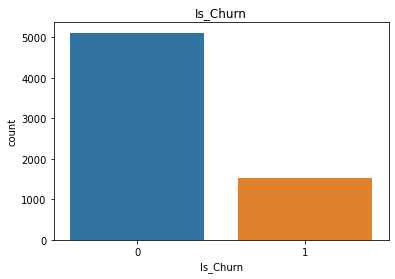

In [22]:
sns.countplot(x=train['Is_Churn'])
plt.title('Is_Churn')

- <b> From the customer churn values,we can infer this is an imbalanced dataset.</b>

##### Customer churn VS Gender

Text(0.5, 1.0, 'Is_Churn VS Gender')

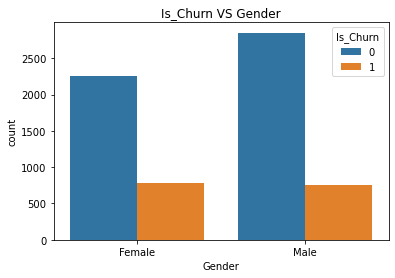

In [26]:
sns.countplot(x=train['Gender'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Gender')

-<b>We can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.</b>

##### Is_Churn VS Income

Text(0.5, 1.0, 'Is_Churn VS Income')

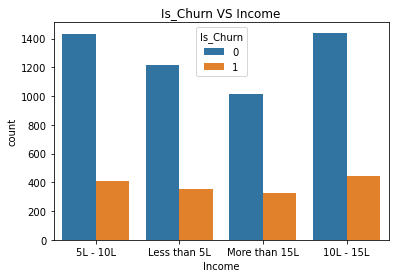

In [27]:
sns.countplot(x=train['Income'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Income')

-<b> Churn rate is less in 'More than 15L' slab of Income.</b>

##### Is_Churn VS Vintage

Text(0.5, 1.0, 'Is_Churn VS Vintage')

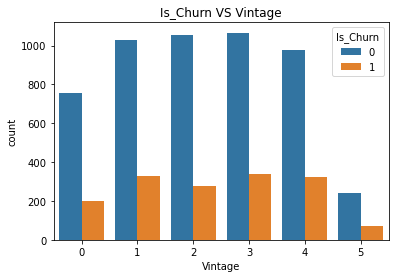

In [28]:
sns.countplot(x=train['Vintage'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Vintage')

-<b> Churn rate is less for customers having vintage equals 5 years.So, more the No. of years the customer is associated with bank, churn rate is less and they can be considered as Loyal customers.</b>

##### Is_Churn VS Transaction_Status

Text(0.5, 1.0, 'Is_Churn VS Transaction_Status')

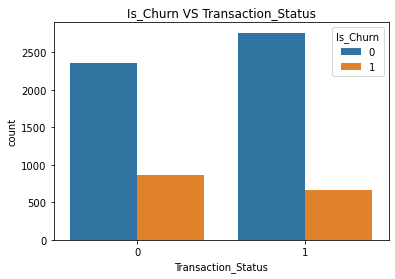

In [29]:
sns.countplot(x=train['Transaction_Status'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Transaction_Status')

- <b> We can see that transation-status is not a influencing factor for customer churn in this data set as the numbers of both are almost the same.</b>

##### Is_Churn VS Product_Holdings

Text(0.5, 1.0, 'Is_Churn VS Product_Holdings')

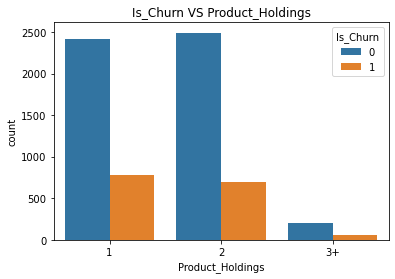

In [30]:
sns.countplot(x=train['Product_Holdings'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Product_Holdings')

- <b> The customers having No. of product holdings with the bank more than 3 are having very less churn.They are continuing with the services of bank and they are active customers.</b>

##### Is_Churn VS Credit_Card

Text(0.5, 1.0, 'Is_Churn VS Credit_Card')

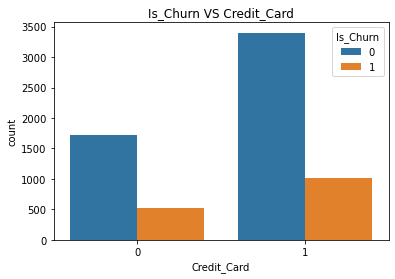

In [32]:
sns.countplot(x=train['Credit_Card'],hue=train['Is_Churn'])
plt.title('Is_Churn VS Credit_Card')

- <b> We can see that Credit-card ownership is not a contributing factor for customer churn in this data set as the numbers of both are almost the same.</b>

## 3.Encoding the categorical variables

In [34]:
# Convert String values (Female and Male) of Gender column to 1 and 0

train['Gender'].replace({'Female':1,'Male':0},inplace=True)
test['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [35]:
# Convert String values of Income column to 0,1,2 and 3

train['Income'].replace({'Less than 5L':0,'5L - 10L':1,'10L - 15L':2,'More than 15L':3},inplace=True)
train['Income']

test['Income'].replace({'Less than 5L':0,'5L - 10L':1,'10L - 15L':2,'More than 15L':3},inplace=True)

In [36]:
# Convert String values of Product_Holdings column to 1,2 and 3

train['Product_Holdings'].replace({'1':1,'2':2,'3+':3},inplace=True)

test['Product_Holdings'].replace({'1':1,'2':2,'3+':3},inplace=True)

In [37]:
# Convert String values of Credit_Category column to 1,2 and 3
train['Credit_Category'].replace({'Poor':0,'Good':2,'Average':1},inplace=True)

test['Credit_Category'].replace({'Poor':0,'Good':2,'Average':1},inplace=True)


In [39]:
train.dtypes#checking the datatypes after conversion

Age                     int64
Gender                  int64
Income                  int64
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int64
Credit_Card             int64
Credit_Category         int64
Is_Churn                int64
dtype: object

## 4. Scaling th Dataset

In [153]:
#Performing Standard scaling for train data
from sklearn.preprocessing import StandardScaler #importing StandardScaler function from sklearn library
col_names = ['Age', 'Balance']# considering continous columns-'Age', 'Balance' for scaling
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train[col_names] = features

In [161]:
#Performing Standard scaling for test data

features = test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
test[col_names] = features

#### Correlation Matrix

In [162]:
#plt.figure(figsize=(10,10)) 
#sns.heatmap(train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix 

## 5. Modelling

In [163]:
#splitting the data into inputs and output for training
# 'X' input is train dropping the target variable.

X_train = train.drop(['Is_Churn'],axis=1)
y_train = train['Is_Churn']   #target



In [164]:
#input for prediction
X_test=test

### 1. Logistic Regression Classifier

<AxesSubplot:ylabel='count'>

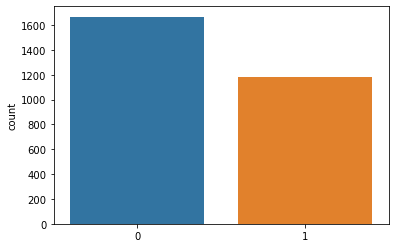

In [165]:
#importing  Logistic regression from the scikit-learn library 
from sklearn.linear_model import LogisticRegression


# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression(class_weight='balanced')
#class_weight='balanced' is assigned for handling the imbalance dataset

# fit this into xtrain and y train to create the model
logit_model.fit(X_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred_log = logit_model.predict(X_test)
sns.countplot(x=y_pred_log)

In [166]:
log=pd.DataFrame(y_pred_log)
log=pd.DataFrame(y_pred_log,index=sam.index)

log.columns =['Is_Churn']
log.to_csv('log_new.csv')

-F1 score obtained is 0.588

#### Hyper parameter tuning using GridSearch CV

In [167]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
random_state=[1,10,100,1000]
param_grid = {'C': c_space,
             'random_state':random_state}

from sklearn.model_selection import GridSearchCV
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'random_state': 1}
Best score is 0.7711278195488723


<AxesSubplot:ylabel='count'>

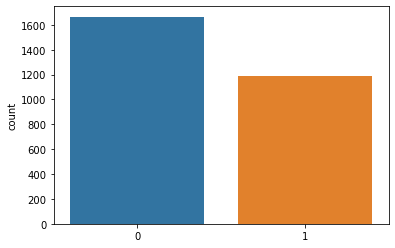

In [168]:
logit_model_1 = LogisticRegression(class_weight='balanced',C=0.05179474679231213,random_state=1)

# fit this into xtrain and y train to create the model
logit_model_1.fit(X_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred_log_Grid = logit_model_1.predict(X_test)
y_pred_log_Grid
sns.countplot(x=y_pred_log_Grid)

In [169]:
log=pd.DataFrame(y_pred_log_Grid)
log=pd.DataFrame(y_pred_log,index=sam.index)

log.columns =['Is_Churn']
log.to_csv('log_new_Grid.csv')

-F1 score obtained is 0.5884317856003701.

### 2.Random Forest Classifier

<AxesSubplot:ylabel='count'>

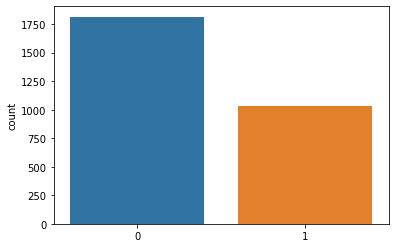

In [170]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',min_samples_split=80)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
sns.countplot(x=y_pred_rf)

In [171]:
rf=pd.DataFrame(y_pred_rf,index=sam.index)
rf.columns =['Is_Churn']
rf.to_csv('rf_new.csv')

-F1 score obtained is 0.5760459392945037.

In [172]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 119, 138, 157, 176, 195, 215, 234, 253, 272, 291, 311, 330, 349, 368, 387, 407, 426, 445, 464, 483, 503, 522, 541, 560, 579, 598, 618, 637, 656, 675, 694, 714, 733, 752, 771, 790, 810, 829, 848, 867, 886, 906, 925, 944, 963, 982, 1002, 1021, 1040, 1059, 1078, 1097, 1117, 1136, 1155, 1174, 1193, 1213, 1232, 1251, 1270, 1289, 1309, 1328, 1347, 1366, 1385, 1405, 1424, 1443, 1462, 1481, 1501, 1520, 1539, 1558, 1577, 1596, 1616, 1635, 1654, 1673, 1692, 1712, 1731, 1750, 1769, 1788, 1808, 1827, 1846, 1865, 1884, 1904, 1923, 1942, 1961, 1980, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False]}


In [173]:
#Now, we instantiate the random search and fit it like any Scikit-Learn model:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 119, 138, 157,
                                                         176, 195, 215, 234,
                                                         253, 272, 291, 311,
                                                         330, 349, 368, 387,
                                                         407, 426, 445, 464,
                                                         483, 503,

In [174]:
rf_random.best_score_# displaying the score of the tuned model

0.7705265541893486

In [175]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_# displaying the best set of parameter values

{'n_estimators': 1251,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 21,
 'bootstrap': True}

In [176]:
#We can fit the model, display the best hyperparameters, and evaluate performance:
rfc=RandomForestClassifier(class_weight='balanced',n_estimators=1251,min_samples_split=10, min_samples_leaf= 10,max_features='sqrt', max_depth=21, bootstrap= True)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred_rfc_RS=rfc.predict(X_test)
#sns.countplot(x=y_pred_rfc_RS)

In [177]:
rf=pd.DataFrame(y_pred_rfc_RS,index=sam.index)

rf.columns =['Is_Churn']
rf.to_csv('rf_new_RS.csv')